,Mkt-RF,SMB,HML,RF
1926-07-01,0.066558,-0.419790,-0.505529,0.009
1926-07-02,0.396038,-0.556966,-0.163151,0.009
1926-07-06,0.132454,0.454706,-0.625362,0.009
1926-07-07,0.057144,-1.019934,0.025157,0.009
1926-07-08,0.170109,-0.625553,0.230584,0.009


In [25]:
rf

,RF
19260701,0.009
19260702,0.009
19260706,0.009
19260707,0.009
19260708,0.009
...,...
20190624,0.009
20190625,0.009
20190626,0.009
20190627,0.009


In [30]:
from scipy import stats
import numpy as np
import pandas as pd

import matplotlib as mpl
import matplotlib.pyplot as plt
import pandas_datareader.data as pddata
import altair as alt
import statsmodels.api as sm

import plotly.plotly as py
import cufflinks as cf
from plotly.offline import init_notebook_mode , plot , iplot , download_plotlyjs
init_notebook_mode(connected=True)
cf.go_offline()
    
from ggplot import * 

'''
fama french factor 
'''
filename = r'data/F-F_Research_Data_Factors_daily.CSV'
ff_factors = pd.read_csv(filename, index_col=0, skiprows=4)

ff_factors.head()

ff_factors.index = pd.to_datetime( ff_factors.index , format = '%Y%m%d')
ff_factors_index = pd.to_datetime( ff_factors.index , format = '%Y%m%d')
rf = pd.DataFrame(ff_factors['RF'])
ff_factors = ff_factors.drop('RF',1)
from sklearn.preprocessing import StandardScaler
ff_factors = StandardScaler().fit_transform(ff_factors)
ff_factors = pd.DataFrame(ff_factors,columns=['Mkt-RF', 'SMB', 'HML'])
ff_factors.index = ff_factors_index
ff_factors = pd.concat([ff_factors,rf],1)

ff_factors.head()


'''

'''
ticker = 'GOOG'
beg_date = '2014-01-01'
end_date = '2018-12-31'

p = pddata.DataReader(ticker, data_source='yahoo',
                      start=beg_date, end=end_date,
                      retry_count=3, pause=0.1,
                      session=None, access_key=None)
log_ret = np.log(p['Adj Close']/p.shift(1)['Adj Close']).dropna()
ret = log_ret 

'''
# Merge data to be used
table = ff_factors['2014':'2018']
table.loc[:, 'RET'] = ret.values
table.head()

# OLS Regression
y = table.ret
x = table[['Mkt-RF', 'SMB', 'HML', 'RF']]
x = sm.add_constant(x)
results = sm.OLS(y,x).fit()
print(results.summary())
'''

table = ff_factors['2014':'2018']
table.loc[:, 'ret'] = ret

table.ret = table.ret - table.RF
y = table.ret
x = table[['Mkt-RF', 'SMB', 'HML', 'RF']]
x = sm.add_constant(x)
results = sm.OLS(y,x).fit()
print("    %s"%str(results.summary()))

table.iplot(title='Fama French OLS Regression daily' , yTitle = '')

'''
pca model of fama french

data = table 

'''
table.head()
factors = table.drop('ret',1)
factor_cor = np.corrcoef(factors)
print(factor_cor)

from sklearn.preprocessing import StandardScaler
factors = StandardScaler().fit_transform(factors)
'''scaler '''
from sklearn.decomposition import PCA as pca

for i in range(4):
    p = pca(n_components=(i+1))
    results  = p.fit_transform(factors)
    results.shape
    print("   i = %s   proportion >>  %s "%((i+1) , (p.explained_variance_ratio_)))
    print("  Cumulative Proportion >> %s \n"%str(sum(p.explained_variance_ratio_)) )
print('  因爲都低於95%所以代表每個因子都重要(對於解釋模型)')

C:\Users\HP T\Anaconda3\lib\site-packages\numpy\core\fromnumeric.py:2389: FutureWarning:

Method .ptp is deprecated and will be removed in a future version. Use numpy.ptp instead.



                                OLS Regression Results                            
Dep. Variable:                    ret   R-squared:                       0.541
Model:                            OLS   Adj. R-squared:                  0.539
Method:                 Least Squares   F-statistic:                     369.0
Date:                Sun, 01 Sep 2019   Prob (F-statistic):          5.57e-210
Time:                        18:39:48   Log-Likelihood:                 3990.1
No. Observations:                1258   AIC:                            -7970.
Df Residuals:                    1253   BIC:                            -7944.
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.0002      0.000      0.666     

[[ 1.         -0.21960591  0.68377553 ... -0.24547938 -0.01220782
  -0.85738343]
 [-0.21960591  1.         -0.81668117 ... -0.89130049  0.96255989
  -0.17619835]
 [ 0.68377553 -0.81668117  1.         ...  0.50237342 -0.63484024
  -0.42174223]
 ...
 [-0.24547938 -0.89130049  0.50237342 ...  1.         -0.9444857
   0.56097342]
 [-0.01220782  0.96255989 -0.63484024 ... -0.9444857   1.
  -0.42024587]
 [-0.85738343 -0.17619835 -0.42174223 ...  0.56097342 -0.42024587
   1.        ]]
   i = 1   proportion >>  [0.32390507] 
  Cumulative Proportion >> 0.3239050674712761 

   i = 2   proportion >>  [0.32390507 0.252609  ] 
  Cumulative Proportion >> 0.5765140637391852 

   i = 3   proportion >>  [0.32390507 0.252609   0.22041377] 
  Cumulative Proportion >> 0.7969278356511396 

   i = 4   proportion >>  [0.32390507 0.252609   0.22041377 0.20307216] 
  Cumulative Proportion >> 1.0 

  因爲都低於95%所以代表每個因子都重要(對於解釋模型)


In [29]:
table

,Mkt-RF,SMB,HML,RF,ret
2014-01-02,-0.855986,-0.471231,0.162108,0.00,-0.096796
2014-01-03,0.000662,0.609028,0.042276,0.00,-0.097322
2014-01-06,-0.347646,-0.985640,0.418892,0.00,-0.078912
2014-01-07,0.612554,0.677616,-0.728075,0.00,-0.070905
2014-01-08,0.010076,0.008884,-0.231627,0.00,-0.087921
...,...,...,...,...,...
2018-12-24,-2.428077,1.689287,-0.796551,0.01,-0.093395
2018-12-26,4.735762,-0.025410,-1.823686,0.01,-0.027231
2018-12-27,0.706691,-1.157109,-0.163151,0.01,-0.085757
2018-12-28,-0.055820,1.260613,0.401773,0.01,-0.096536


In [ ]:
'''
PCA model
Example
'''
df = pd.read_csv(
    filepath_or_buffer='https://archive.ics.uci.edu/ml/machine-learning-databases/iris/iris.data', 
    header=None, 
    sep=',')

df.columns = ['sepal_len', 'sepal_wid', 'petal_len', 'petal_wid', 'class']

df = df.dropna()
x = df.drop('class',1)
''' 1 ,axis = 1 << column '''
y = df['class']

x.head()
# print(np.corrcoef(x))

from sklearn.preprocessing import StandardScaler
x = StandardScaler().fit_transform(x)
'''scaler '''
from sklearn.decomposition import PCA as pca

for i in range(4):
    p = pca(n_components=(i+1))
    results  = p.fit_transform(x)
    results.shape
# results.explained_variance_ratio_.sum()
    print("   i = %s   proportion >>  %s "%((i+1) , (p.explained_variance_ratio_)))
    print("  Cumulative Proportion >> %s \n"%str(sum(p.explained_variance_ratio_)) )


[[ 1.          0.99954913  0.98042566 ... -0.97990056 -0.30719292
  -0.82059469]
 [ 0.99954913  1.          0.98580538 ... -0.97894038 -0.27920383
  -0.80370717]
 [ 0.98042566  0.98580538  1.         ... -0.96417262 -0.12861122
  -0.69256756]
 ...
 [-0.97990056 -0.97894038 -0.96417262 ...  1.          0.35931266
   0.78281248]
 [-0.30719292 -0.27920383 -0.12861122 ...  0.35931266  1.
   0.72939233]
 [-0.82059469 -0.80370717 -0.69256756 ...  0.78281248  0.72939233
   1.        ]]

  iris_cor.shape = (150, 150)


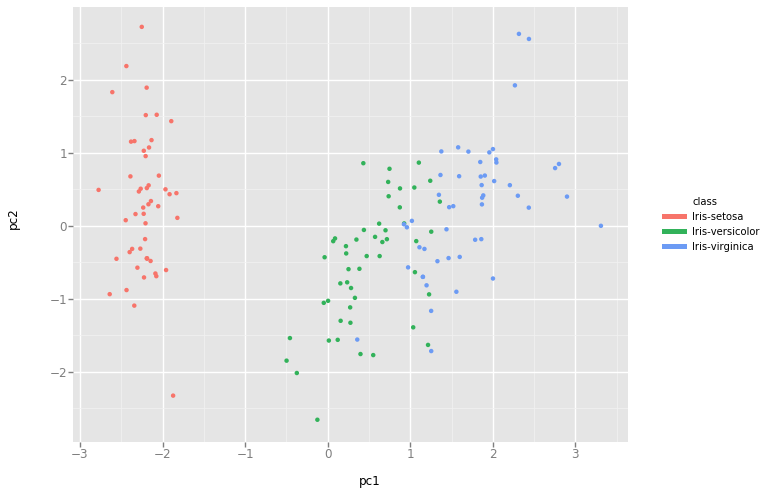

<ggplot: (-9223371959727680473)>

In [172]:
from sklearn.preprocessing import StandardScaler

df = pd.read_csv(
    filepath_or_buffer='https://archive.ics.uci.edu/ml/machine-learning-databases/iris/iris.data', 
    header=None, 
    sep=',')

df.columns = ['sepal_len', 'sepal_wid', 'petal_len', 'petal_wid', 'class']

df = df.dropna()
x = df.drop('class',1)
''' 1 ,axis = 1 << column '''
x = StandardScaler().fit_transform(x)
y = df['class']
iris_cor = np.corrcoef(x)
print(iris_cor)
print('\n  iris_cor.shape = %s'%str(iris_cor.shape))
p = pca(n_components=2)
results = p.fit_transform(x)
results.shape
# df.columns = ['a','b']
ff = pd.DataFrame(results,columns=['pc1','pc2'])
x = pd.DataFrame(df.loc[:,'class'])
df = pd.concat([ff,x],axis=1)

gg = ggplot(aes(x = 'pc1' , y = 'pc2' , colour = 'class' ) , data = df ) + geom_point()
gg

# df.iplot(kind="scatter", x = 'pc1' , y = 'pc2' , theme="white",mode ='markers')

In [ ]:
'''
嘗試 跨平臺 執行 r 

import rpy2.robjects as robjects
from rpy2.robjects.vectors import StrVector
import rpy2.robjects.packages as r
from rpy2.robjects.packages import importr

# import R's "base" package
base = importr('base')

# import R's "utils" package
utils = importr('utils')

cor = robjects.r('cov')
# robjects.r('cor(x)')

'''
